In [1]:
import re
import numpy as np

def remove_docstrings(code):
    # 使用正则表达式匹配被 """ 包括的部分，并替换为空字符串
    cleaned_code = re.sub(r'""".*?"""', '', code, flags=re.DOTALL)
    cleaned_code = re.sub(r"'''.*?'''", '', cleaned_code, flags=re.DOTALL)
    return cleaned_code

def cosine_similarity_matrix(nl_features, code_features):
    # 计算每个特征向量的范数
    nl_norms = np.linalg.norm(nl_features, axis=1, keepdims=True)
    code_norms = np.linalg.norm(code_features, axis=1, keepdims=True)
    
    # 计算点积
    dot_product = np.dot(nl_features, code_features.T)
    
    # 计算余弦相似度矩阵
    cosine_similarity = dot_product / (nl_norms * code_norms.T)
    
    return cosine_similarity

In [2]:
def remove_padding_intervals(tokenized_id_data):
    """
    移除 tokenized_id_data 中所有 `[0,0]` 区间（除非它是开头的第一个区间）。

    Args:
    - tokenized_id_data (list of lists): 包含区间的列表，每个区间是一个长度为 2 的列表。

    Returns:
    - filtered_data (list of lists): 移除 `[0,0]` 填充数据后的区间列表。
    """
    if isinstance(tokenized_id_data, np.ndarray):
        tokenized_id_data = tokenized_id_data.tolist()  # 将 NumPy 数组转换为列表
    # 处理的结果列表
    filtered_data = []

    # 保留开头的 `[0,0]` 区间（如果存在）
    if tokenized_id_data and tokenized_id_data[0] == [0,0]:
        filtered_data.append([0,0])
        start_index = 1  # 从第二个元素开始检查
    else:
        start_index = 0

    # 处理剩余的区间
    for interval in tokenized_id_data[start_index:]:
        if interval != [0,0]:  # 仅添加非 `[0,0]` 区间
            filtered_data.append(interval)

    return filtered_data

In [3]:
import json
def load_loss_data(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return np.array(data)

In [4]:
with open("/home/yiming/cophi/projects/fork/CodeBERT/GraphCodeBERT/codesearch/dataset/python/valid.jsonl", "r") as f:
    comment_dataset = [json.loads(line) for line in f.readlines()]

with open("/home/yiming/cophi/projects/fork/CodeBERT/GraphCodeBERT/codesearch/dataset/python/codebase.jsonl", "r") as f:
    code_dataset = [json.loads(line) for line in f.readlines()]


In [5]:
nl_urls=[]
code_urls=[]
for comment_example in comment_dataset:
    nl_urls.append(comment_example['url'])
    
for code_example in code_dataset:
    code_urls.append(code_example['url'])

In [6]:
import matplotlib.pyplot as plt

In [7]:
import json
import os

# 文件路径
json_file_path = '/home/yiming/cophi/training_dynamic/temp_featrues/valid_tokenized_code_tokens.json'


# 读取JSON文件
with open(json_file_path, 'r', encoding='utf-8') as f:
    code_tokens_data = json.load(f)

# 文件路径
json_file_path = '/home/yiming/cophi/training_dynamic/temp_featrues/valid_tokenized_nl_tokens.json'


# 读取JSON文件
with open(json_file_path, 'r', encoding='utf-8') as f:
    nl_tokens_data = json.load(f)

In [8]:
code_ind = 30273
comment_ind = 5783

In [9]:
comment_id = comment_ind

In [10]:
code_data = code_tokens_data[code_ind]
comment_data = nl_tokens_data[comment_ind]

In [16]:
output_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens/Model/code_labels/'

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历列表的每一项
for i, token_list in enumerate(code_data):
   
    # 生成输出文件路径
    output_file_path = os.path.join(output_dir, f'text_{i}.txt')
    
    # 保存到文件中
    with open(output_file_path, 'w', encoding='utf-8') as f_out:
        f_out.write(str(code_data[i]))
    # 找到</s>的位置，并保留其之前的部分
    if '</s>' == token_list:
        code_length = i
        break

print("处理完成！")

处理完成！


In [17]:
output_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens/Model/comment_labels/'

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# comment_data = ['<s>'] + comment_dataset[comment_id]["docstring_tokens"] + ['</s>']
# 遍历列表的每一项
for i, token_list in enumerate(comment_data):
   
    # 生成输出文件路径
    output_file_path = os.path.join(output_dir, f'text_{i}.txt')
    
    # 保存到文件中
    with open(output_file_path, 'w', encoding='utf-8') as f_out:
        f_out.write(comment_data[i])
    # 找到</s>的位置，并保留其之前的部分
    if '</s>' == token_list:
        comment_length = i
        break

print("处理完成！")

处理完成！


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
def get_top_k_indices(sim_matrix, k):
    return np.argsort(-sim_matrix, axis=1)[:, :k]  # 获取前 k 个索引

# 计算相似度函数（使用余弦相似度）
def compute_similarity(tokens_a, tokens_b):
    return cosine_similarity(tokens_a, tokens_b)

(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/embedding.npy
x_min: 2.723661279678345, x_max: 15.341452264785767, y_min: -4.950605058670044, y_max: 2.572516584396362
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/scale.npy


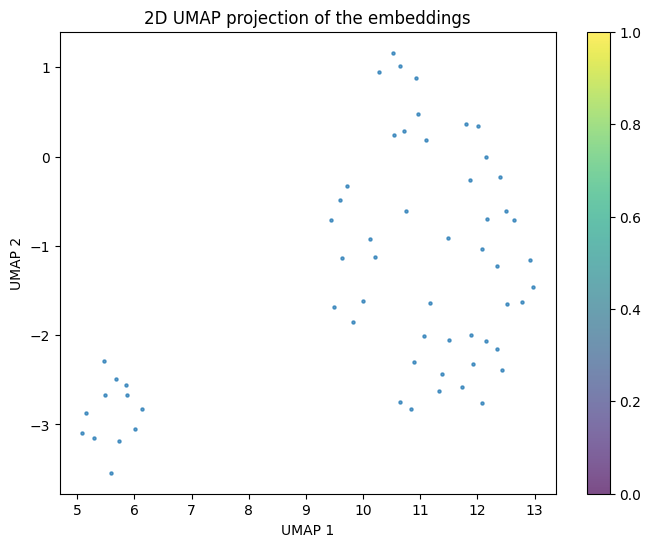

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_1/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/embedding.npy
x_min: 6.2910016059875495, x_max: 26.306136798858642, y_min: -0.5922739505767822, y_max: 7.551555633544922
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/scale.npy


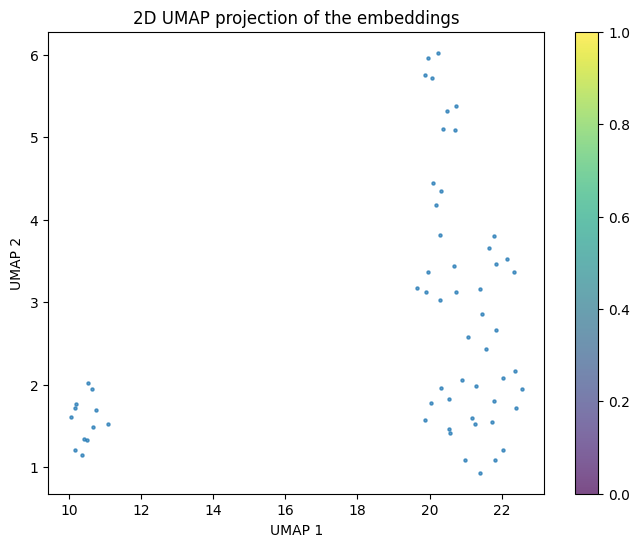

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_2/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/embedding.npy
x_min: -8.533509254455566, x_max: 9.635016441345215, y_min: -0.2069274425506591, y_max: 6.6292320728302006
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/scale.npy


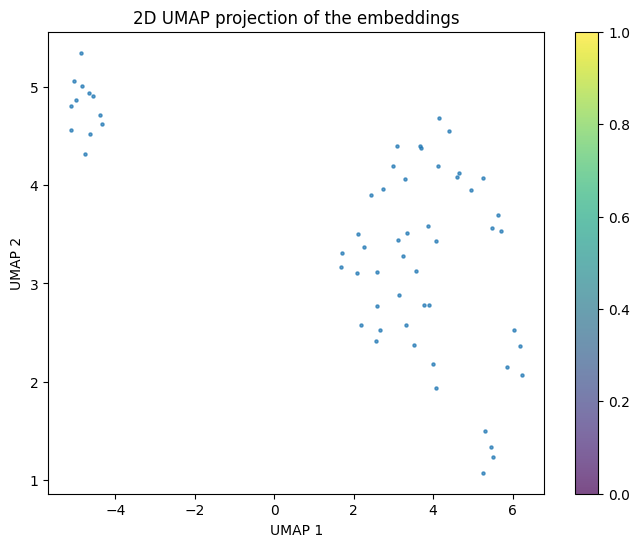

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_3/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/embedding.npy
x_min: -5.455283069610596, x_max: 9.445073986053467, y_min: -4.968887281417847, y_max: 5.265890312194824
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/scale.npy


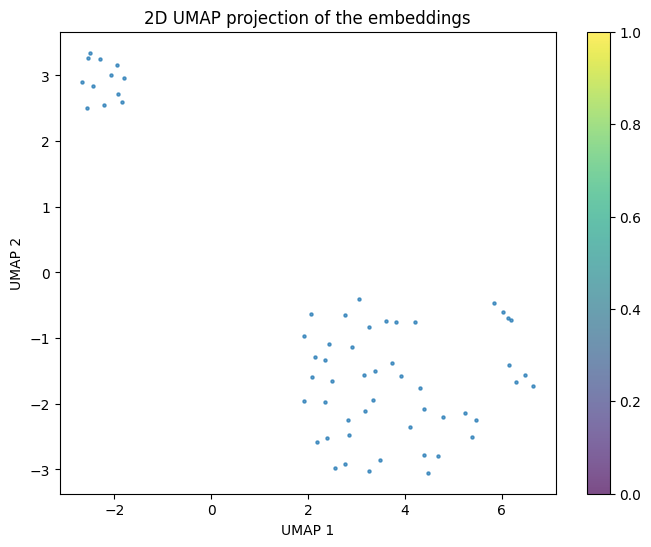

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_4/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/embedding.npy
x_min: 6.568786907196046, x_max: 17.611967754364013, y_min: -11.292362689971924, y_max: 2.5555302314460278
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/scale.npy


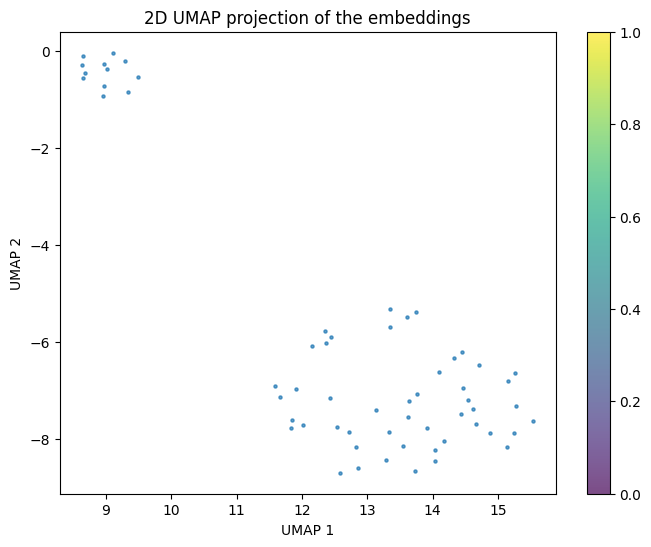

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_5/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/embedding.npy
x_min: -7.4601874351501465, x_max: 14.195215702056885, y_min: 1.401234769821167, y_max: 12.151851987838745
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/scale.npy


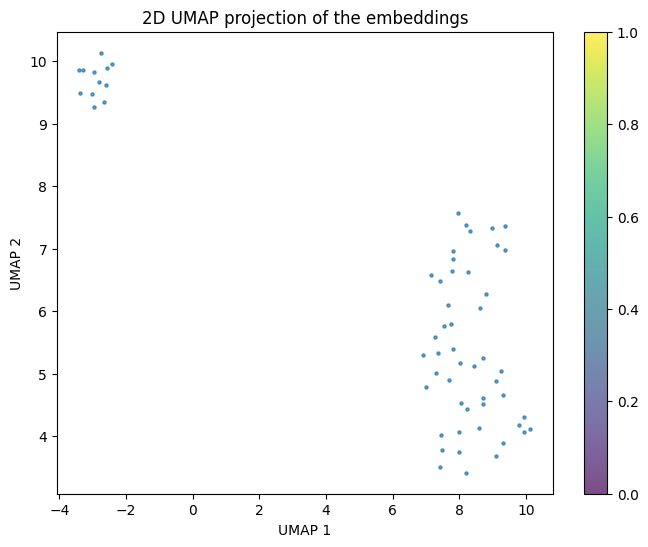

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_6/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/embedding.npy
x_min: -3.5752695083618162, x_max: 3.707534599304199, y_min: -11.766710662841795, y_max: 10.598474884033202
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/scale.npy


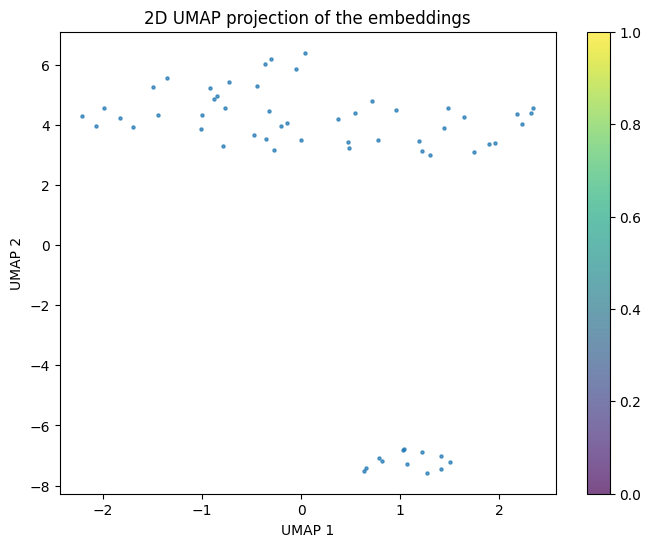

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_7/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/embedding.npy
x_min: -4.960596084594727, x_max: 3.8670103549957275, y_min: 3.8643094062805177, y_max: 19.079462909698485
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/scale.npy


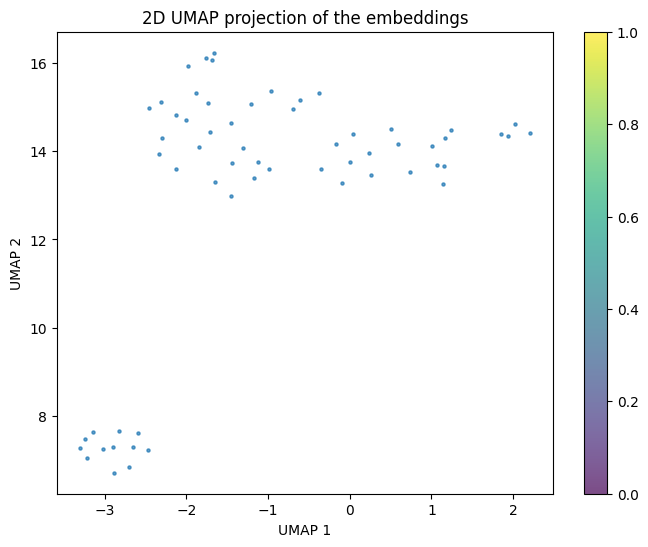

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_8/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/embedding.npy
x_min: -5.465391707420348, x_max: 15.435600471496581, y_min: 0.5940234184265138, y_max: 14.263504314422608
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/scale.npy


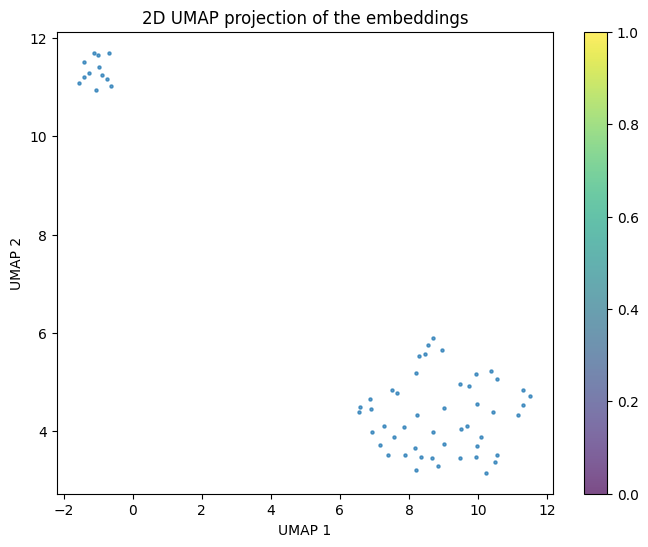

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_9/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/embedding.npy
x_min: 8.088140296936036, x_max: 19.270839881896972, y_min: -14.220891952514648, y_max: 19.76253604888916
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/scale.npy


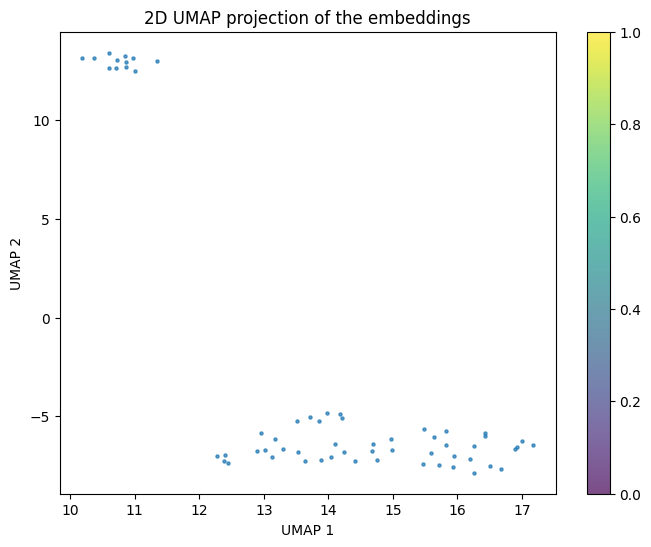

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_10/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/embedding.npy
x_min: -5.586097311973572, x_max: 16.653113079071044, y_min: -2.891028332710266, y_max: 4.730265188217163
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/scale.npy


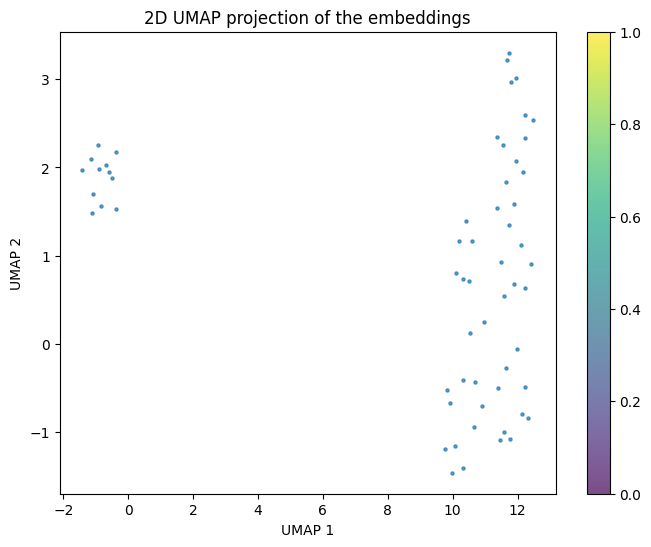

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_11/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/embedding.npy
x_min: -4.3515989780426025, x_max: 13.953363418579102, y_min: 7.3462728500366214, y_max: 17.835182762145998
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/scale.npy


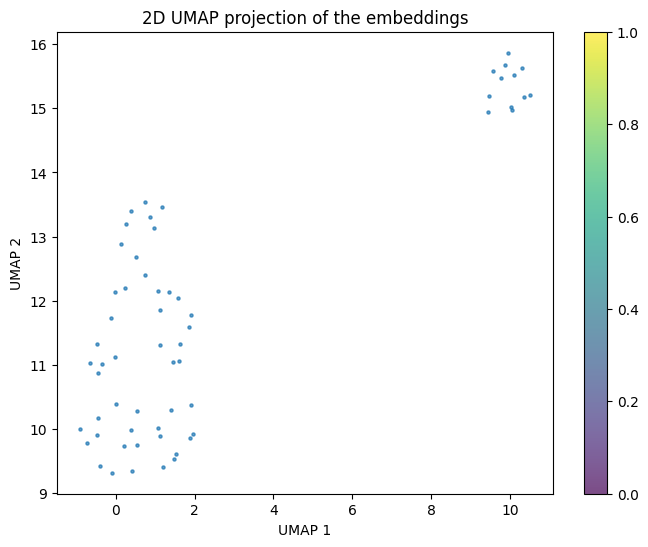

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_12/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/embedding.npy
x_min: 3.4040637493133543, x_max: 10.562154722213744, y_min: -2.802211809158325, y_max: 9.068105030059815
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/scale.npy


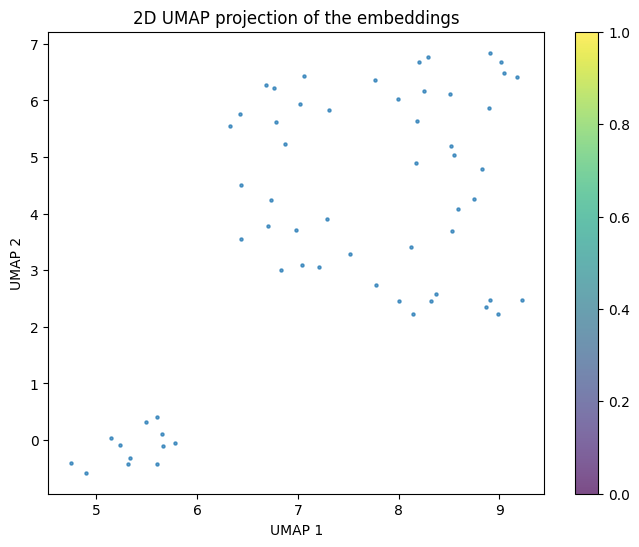

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_13/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/embedding.npy
x_min: 3.633358955383301, x_max: 15.2214937210083, y_min: 2.5694995880126954, y_max: 8.491699600219727
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/scale.npy


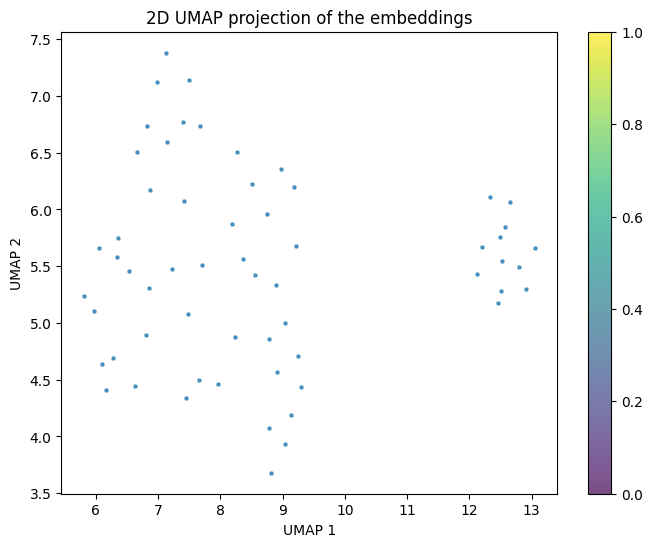

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_14/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/embedding.npy
x_min: -2.053963160514831, x_max: 6.5435398578643795, y_min: 1.1587759494781495, y_max: 9.567069864273071
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/scale.npy


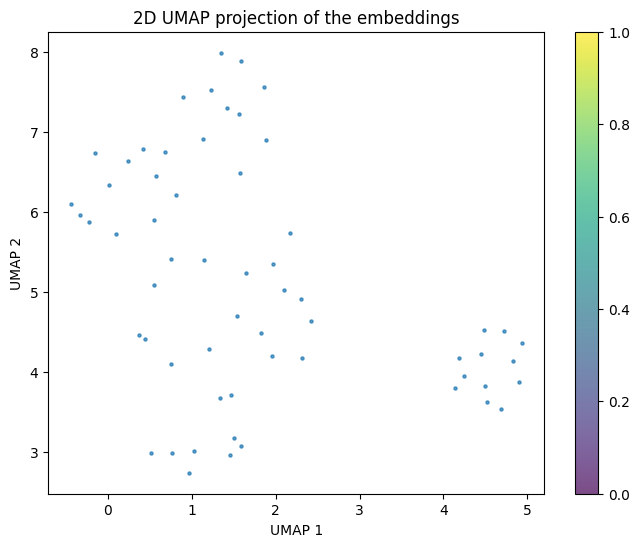

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_15/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/embedding.npy
x_min: 4.850399017333984, x_max: 13.26583480834961, y_min: -0.32993948459625244, y_max: 7.962071657180786
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/scale.npy


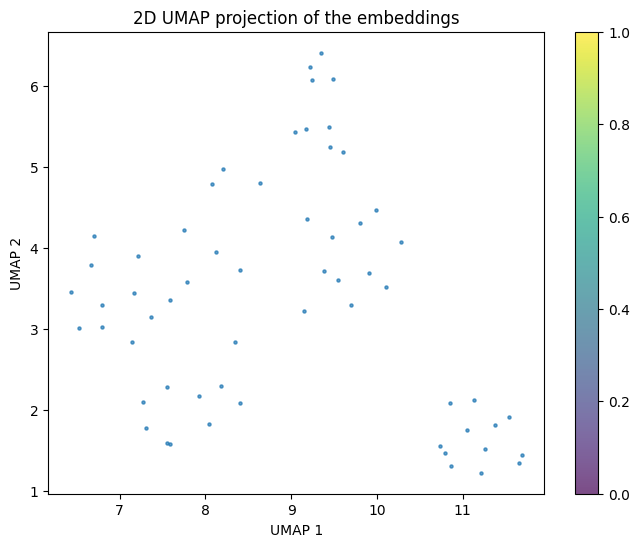

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_16/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/embedding.npy
x_min: 1.3864821910858154, x_max: 7.971765327453613, y_min: 7.881101417541504, y_max: 16.76454563140869
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/scale.npy


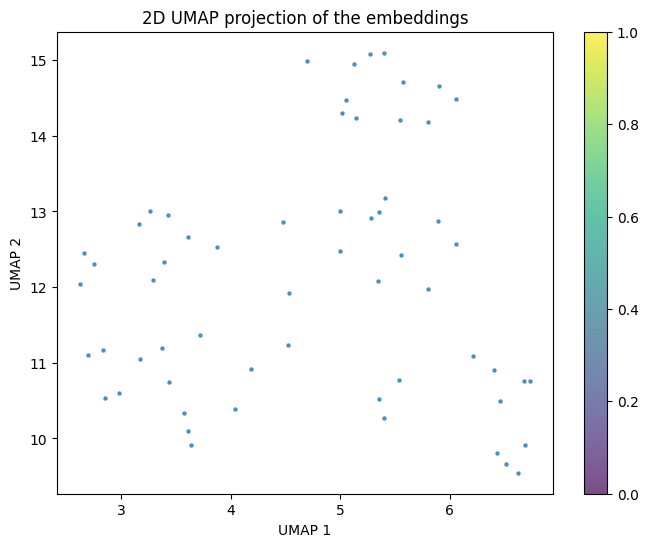

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_17/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/embedding.npy
x_min: -2.235176539421081, x_max: 5.424631929397583, y_min: 7.09015417098999, y_max: 14.963727474212646
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/scale.npy


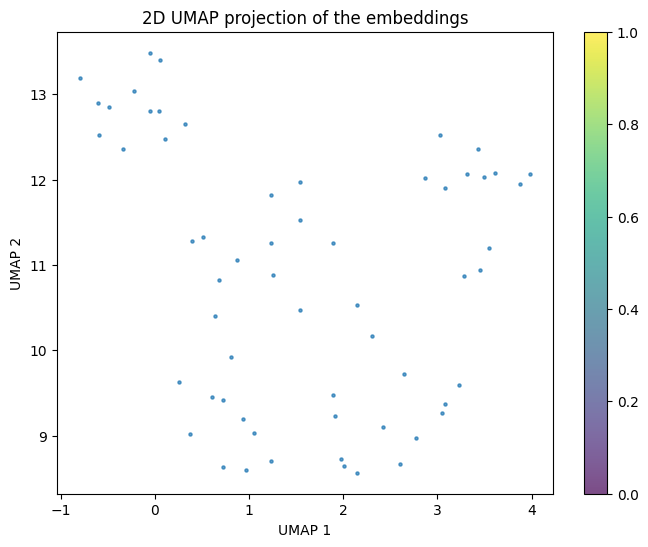

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_18/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/embedding.npy
x_min: -1.491620172560215, x_max: 6.821175765991211, y_min: 11.332083129882813, y_max: 18.362405395507814
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/scale.npy


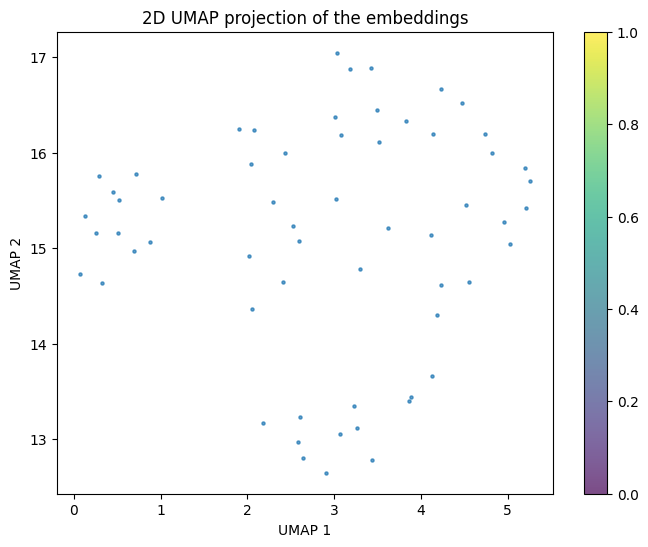

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_19/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/embedding.npy
x_min: -0.059022474288940474, x_max: 6.6375425338745115, y_min: 3.2853408813476563, y_max: 11.922651672363282
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/scale.npy


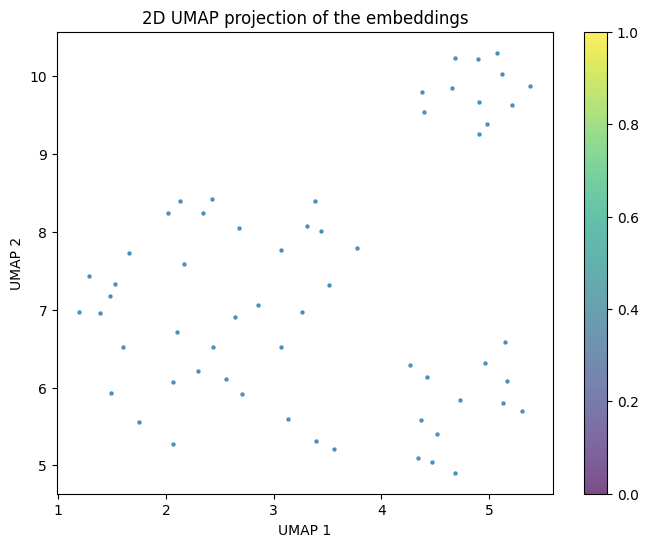

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_20/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/embedding.npy
x_min: -2.5027915716171263, x_max: 6.19087438583374, y_min: 0.5391825199127198, y_max: 8.095759296417237
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/scale.npy


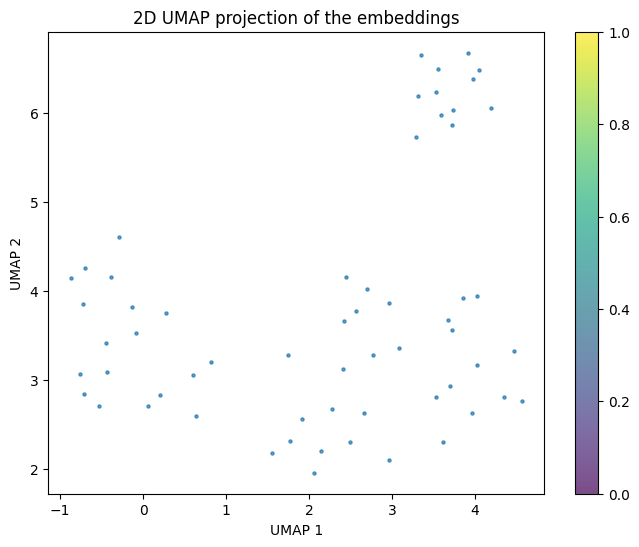

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_21/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/embedding.npy
x_min: -5.380728530883789, x_max: 5.407900619506836, y_min: -4.197468566894531, y_max: 3.8906603336334227
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/scale.npy


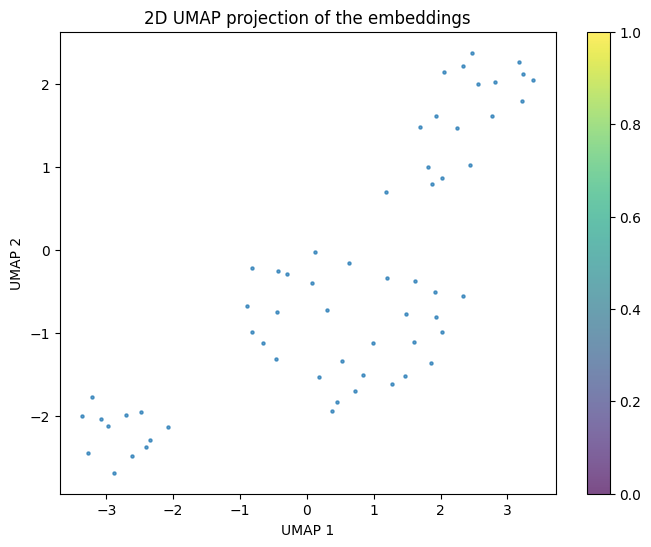

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_22/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/embedding.npy
x_min: 0.31440167427063015, x_max: 10.98747272491455, y_min: 4.7657716274261475, y_max: 13.300275564193726
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/scale.npy


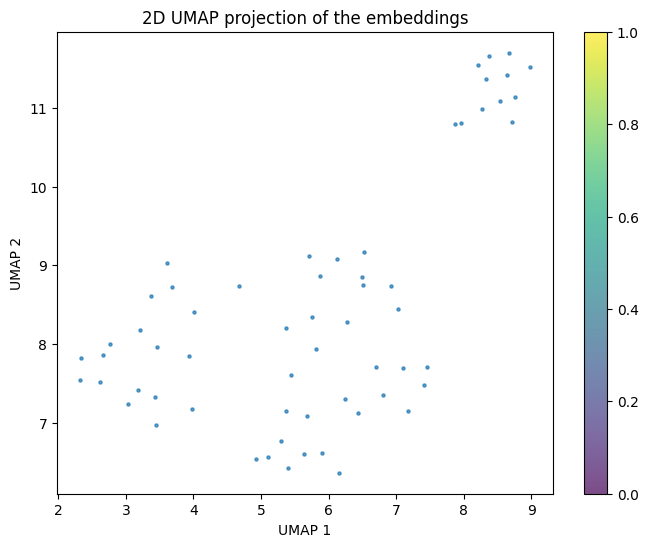

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_23/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/embedding.npy
x_min: -1.7234280824661252, x_max: 10.507798147201537, y_min: 6.366111087799072, y_max: 10.813359928131103
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/scale.npy


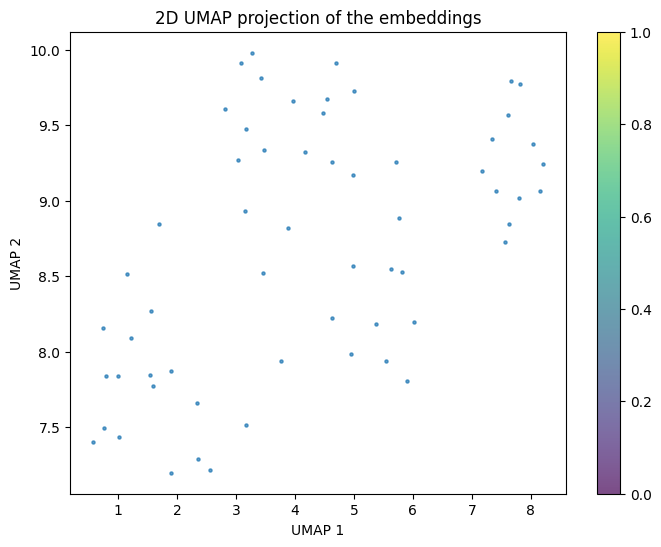

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_24/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/embedding.npy
x_min: 8.757015228271484, x_max: 18.76467514038086, y_min: -5.304709196090698, y_max: 4.558327674865723
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/scale.npy


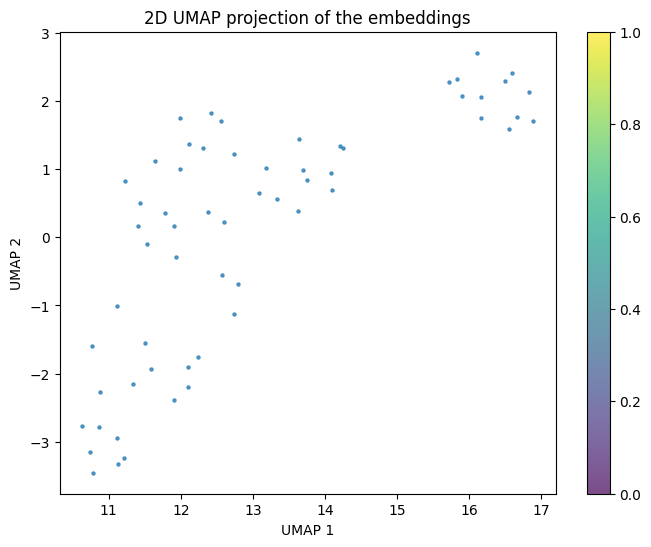

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_25/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/embedding.npy
x_min: 1.9306145191192627, x_max: 9.748827171325683, y_min: -2.4959629833698274, y_max: 8.91945276260376
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/scale.npy


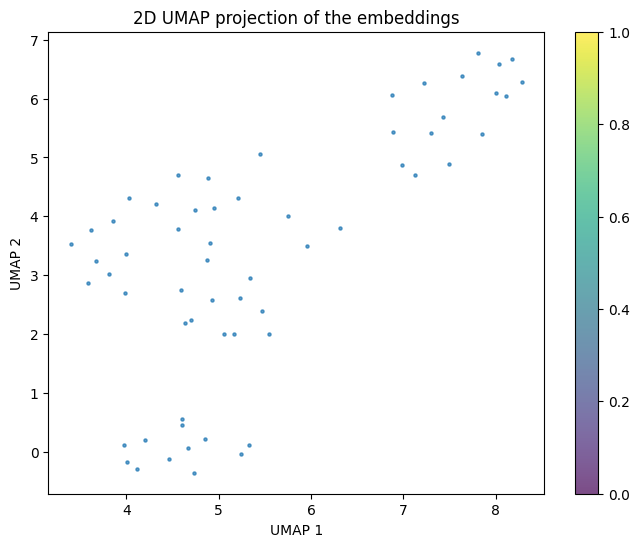

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_26/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/embedding.npy
x_min: 2.9051145553588866, x_max: 15.836254692077636, y_min: -1.4429083108901977, y_max: 4.413278245925904
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/scale.npy


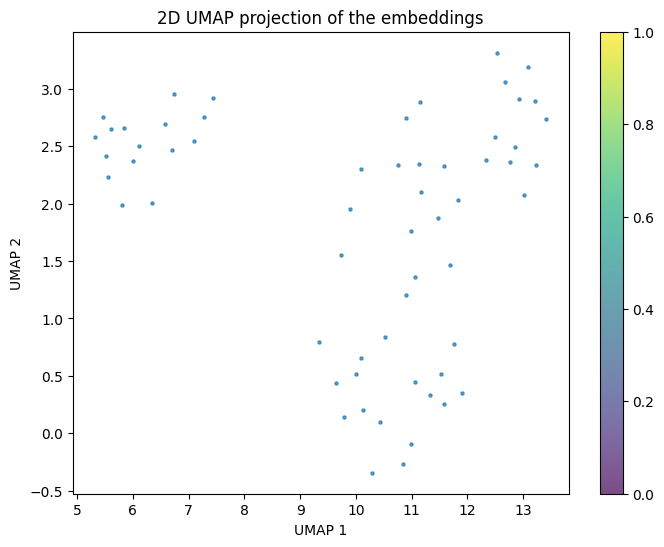

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_27/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/embedding.npy
x_min: 2.2807629108428955, x_max: 10.32914113998413, y_min: 0.2639347553253173, y_max: 11.969298458099365
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/scale.npy


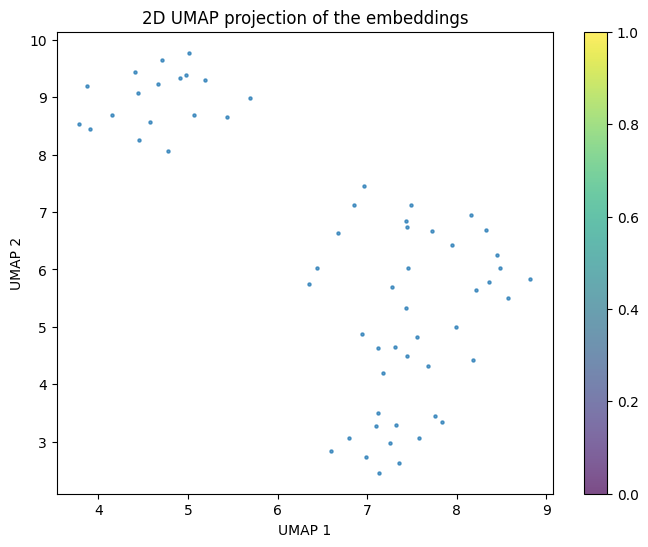

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_28/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/embedding.npy
x_min: 10.870131969451904, x_max: 21.378135204315186, y_min: 1.6526329517364502, y_max: 8.078253746032715
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/scale.npy


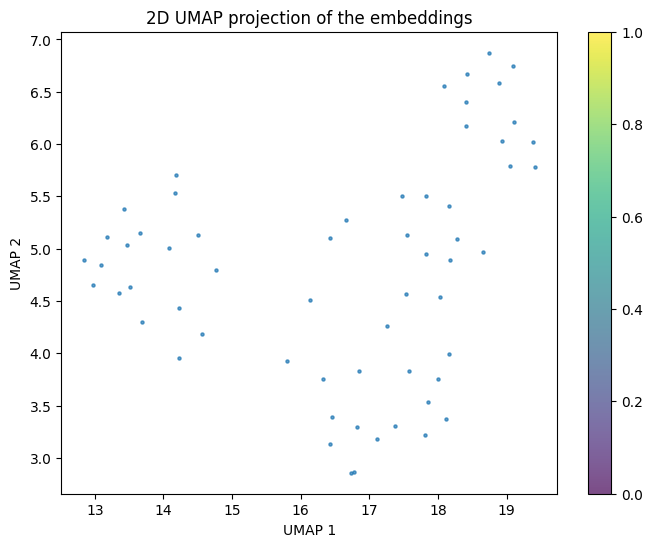

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_29/inter_similarity.npy
(60, 768)
拼接完成！数据已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/train_data.npy
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/code_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/comment_index.json
索引已保存到 /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/index.json
Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/embedding.npy
x_min: 0.6678203105926515, x_max: 12.155568265914917, y_min: 6.619749069213867, y_max: 13.392499923706055
Scale saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/scale.npy


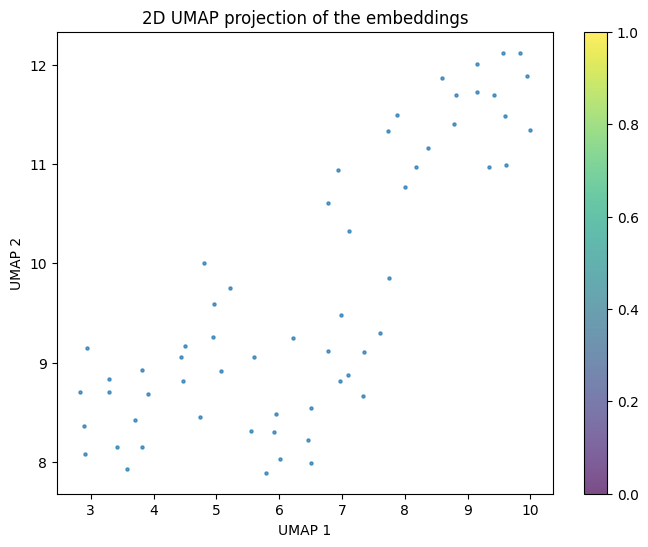

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/embedding.npy
Intra neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/intra_similarity.npy
Inter neighbors saved to /home/yiming/cophi/training_dynamic/gcb_tokens/Model/Epoch_30/inter_similarity.npy


In [19]:
import numpy as np
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"
import umap
import json


for iter in range(30):
    # 文件路径
    output_dir = os.path.join("/home/yiming/cophi/training_dynamic/temp_featrues", 'Epoch_{}'.format(iter+1))
    nl_tokens_path = os.path.join(output_dir, 'new_valid_nl_tokens_new_batch_retrieval.npy')
    code_tokens_path = os.path.join(output_dir, 'new_valid_code_tokens_new_align_attention_batch_retrieval.npy')
    embedding_dir = os.path.join("/home/yiming/cophi/training_dynamic/gcb_tokens/Model", 'Epoch_{}'.format(iter+1))
    output_path = os.path.join(embedding_dir, 'train_data.npy')

    # 获取 n 和 m
    n = comment_length
    m = code_length

    # 读取nl_tokens.npy中的前n条数据
    nl_tokens = np.load(nl_tokens_path)[0][:n]

    # 读取code_tokens.npy中的前m条数据
    code_tokens = np.load(code_tokens_path)[0][:m]

    # 拼接两部分数据
    combined_data = np.concatenate((nl_tokens, code_tokens))
    print(combined_data.shape)

    # 将拼接后的数据保存到train_data.npy
    np.save(output_path, combined_data)

    print(f"拼接完成！数据已保存到 {output_path}")

    # 文件路径
    index_output_path = os.path.join(embedding_dir, 'code_index.json')

    # 生成从0到n+m-1的索引
    indices = list(range(m))

    # 将索引保存到index.json中
    with open(index_output_path, 'w', encoding='utf-8') as f_out:
        json.dump(indices, f_out, ensure_ascii=False, indent=4)

    print(f"索引已保存到 {index_output_path}")

    # 文件路径
    comment_index_output_path = os.path.join(embedding_dir, 'comment_index.json')

    # 生成从0到n+m-1的索引
    indices = list(range(n))

    # 将索引保存到index.json中
    with open(comment_index_output_path, 'w', encoding='utf-8') as f_out:
        json.dump(indices, f_out, ensure_ascii=False, indent=4)

    print(f"索引已保存到 {comment_index_output_path}")

    # 文件路径
    all_index_output_path = os.path.join(embedding_dir, 'index.json')

    # 生成从0到n+m-1的索引
    indices = list(range(len(combined_data)))

    # 将索引保存到index.json中
    with open(all_index_output_path, 'w', encoding='utf-8') as f_out:
        json.dump(indices, f_out, ensure_ascii=False, indent=4)

    print(f"索引已保存到 {all_index_output_path}")

    # 读取高维向量 (num, 768)
    input_path = os.path.join(embedding_dir, 'train_data.npy')
    data = np.load(input_path)

    # 使用UMAP进行降维到二维
    umap_model = umap.UMAP(n_components=2)
    embedding = umap_model.fit_transform(data)

    # 将降维后的结果保存到embedding.npy文件中
    output_path = os.path.join(embedding_dir, 'embedding.npy')
    np.save(output_path, embedding)

    print(f"Embedding saved to {output_path}")

    all_nodes_2d = embedding  # 使用你降维后的二维数据

    x_min, y_min = np.min(all_nodes_2d, axis=0)
    x_max, y_max = np.max(all_nodes_2d, axis=0)
    # ebd_extent = ebd_max - ebd_min
    x_extent = x_max - x_min
    y_extent = y_max - y_min

    x_min = x_min - 0.3 * x_extent
    x_max = x_max + 0.3 * x_extent
    y_min = y_min - 0.3 * y_extent
    y_max = y_max + 0.3 * y_extent

    # x_min = min(x_min, y_min)
    # y_min = min(x_min, y_min)
    # x_max = max(x_max, y_max)
    # y_max = max(x_max, y_max)


    # 打印结果
    print(f"x_min: {x_min}, x_max: {x_max}, y_min: {y_min}, y_max: {y_max}")

    # 将结果保存到指定文件夹
    scale_path = os.path.join(embedding_dir, "scale.npy")
    np.save(scale_path, [x_min, y_min, x_max, y_max])

    print(f"Scale saved to {scale_path}")

    # 可视化 embedding 的二维散点图
    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral', alpha=0.7)
    plt.title('2D UMAP projection of the embeddings')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()
    plt.show()

    print(f"Embedding saved to {output_path}")

    # 读取数据
    data_path = os.path.join(embedding_dir, 'train_data.npy')
    data = np.load(data_path)

    # 读取 comment token 长度
    comment_index_path = os.path.join(embedding_dir, 'comment_index.json')
    with open(comment_index_path, 'r') as f:
        comment_length = len(json.load(f))

    # 拆分 data 成 comment 和 code token
    comments = data[:comment_length]
    codes = data[comment_length:]


    # intra 相似度计算
    intra_comment_sim = compute_similarity(comments, comments)
    intra_code_sim = compute_similarity(codes, codes)

    # inter 相似度计算
    inter_comment_code_sim = compute_similarity(comments, codes)
    inter_code_comment_sim = compute_similarity(codes, comments)

    # 获取前 k 个最近邻
    k = 11  # 假设我们需要前 5 个最近邻

    # intra 计算
    intra_comment_neighbors = get_top_k_indices(intra_comment_sim, k)
    intra_code_neighbors = get_top_k_indices(intra_code_sim, k) + comment_length  # 加 offset

    # inter 计算
    inter_comment_neighbors = get_top_k_indices(inter_comment_code_sim, k) + comment_length  # comment 对 code 的相似度
    inter_code_neighbors = get_top_k_indices(inter_code_comment_sim, k)  # code 对 comment 的相似度

    # 拼接 intra 和 inter 结果
    intra_neighbors = np.concatenate([intra_comment_neighbors, intra_code_neighbors], axis=0)
    inter_neighbors = np.concatenate([inter_comment_neighbors, inter_code_neighbors], axis=0)

    # 保存结果到文件
    intra_path = os.path.join(embedding_dir, "intra_similarity.npy")
    inter_path = os.path.join(embedding_dir, "inter_similarity.npy")

    np.save(intra_path, intra_neighbors)
    np.save(inter_path, inter_neighbors)

    print(f"Intra neighbors saved to {intra_path}")
    print(f"Inter neighbors saved to {inter_path}")